In [1]:
import torch

In [2]:
print(torch.cuda.is_available())

False


In [3]:
from tdc.single_pred import ADME

In [4]:
data_hia = ADME(name = 'HIA_Hou')

Found local copy...
Loading...
Done!


In [5]:
X, y = data_hia.get_data(format = 'DeepPurpose')

In [6]:
# X

In [7]:
# !conda install -c conda-forge rdkit

In [8]:
# !pip install git+https://github.com/bp-kelley/descriptastorus 

In [9]:
# !pip install DeepPurpose

In [10]:
from DeepPurpose import utils, CompoundPred

In [11]:
train, val, test = utils.data_process(X_drug = X, 
                                      y = y, 
                                      drug_encoding = 'DGL_GCN',
                                      random_seed = 'TDC')

Drug Property Prediction Mode...
in total: 578 drugs
encoding drug...
unique drugs: 578
Done.


In [12]:
train.head()

,SMILES,Label,drug_encoding
0,CC(=O)Nc1ccccc1,1,CC(=O)Nc1ccccc1
1,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1,CC(=O)Nc1nnc(S(N)(=O)=O)s1
2,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...,1,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...
3,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C
4,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,1,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...


In [13]:
config = utils.generate_config(drug_encoding = 'DGL_GCN', 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 64)

In [16]:
?utils.generate_config

In [14]:
model = CompoundPred.model_initialize(**config)

Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.71066. Total time 0.00055 hours
Validation at Epoch 1 , AUROC: 0.68907 , AUPRC: 0.90324 , F1: 0.93577
Training at Epoch 2 iteration 0 with loss 0.21002. Total time 0.00111 hours
Validation at Epoch 2 , AUROC: 0.73109 , AUPRC: 0.94613 , F1: 0.94444
Training at Epoch 3 iteration 0 with loss 0.08864. Total time 0.00166 hours
Validation at Epoch 3 , AUROC: 0.74509 , AUPRC: 0.95180 , F1: 0.94339
Training at Epoch 4 iteration 0 with loss 0.14613. Total time 0.0025 hours
Validation at Epoch 4 , AUROC: 0.85434 , AUPRC: 0.97236 , F1: 0.95145
Training at Epoch 5 iteration 0 with loss 0.11329. Total time 0.00305 hours
Validation at Epoch 5 , AUROC: 0.86554 , AUPRC: 0.97867 , F1: 0.94230
Training at Epoch 6 iteration 0 with loss 0.03217. Total time 0.00361 hours
Validation at Epoch 6 , AUROC: 0.90476 , AUPRC: 0.98675 , F1: 0.95238
Training at Epoch 7 iteration 0 with loss 0.03141. Total ti

Validation at Epoch 56 , AUROC: 0.88655 , AUPRC: 0.97121 , F1: 0.92929
Training at Epoch 57 iteration 0 with loss 0.00306. Total time 0.03861 hours
Validation at Epoch 57 , AUROC: 0.90476 , AUPRC: 0.97458 , F1: 0.96078
Training at Epoch 58 iteration 0 with loss 0.00105. Total time 0.03916 hours
Validation at Epoch 58 , AUROC: 0.94257 , AUPRC: 0.99164 , F1: 0.97029
Training at Epoch 59 iteration 0 with loss 0.08072. Total time 0.04 hours
Validation at Epoch 59 , AUROC: 0.90896 , AUPRC: 0.97543 , F1: 0.97087
Training at Epoch 60 iteration 0 with loss 0.00602. Total time 0.04055 hours
Validation at Epoch 60 , AUROC: 0.95798 , AUPRC: 0.99355 , F1: 0.97087
Training at Epoch 61 iteration 0 with loss 0.02638. Total time 0.04138 hours
Validation at Epoch 61 , AUROC: 0.96638 , AUPRC: 0.99542 , F1: 0.95049
Training at Epoch 62 iteration 0 with loss 0.07839. Total time 0.04194 hours
Validation at Epoch 62 , AUROC: 0.96638 , AUPRC: 0.99546 , F1: 0.96226
Training at Epoch 63 iteration 0 with loss 0

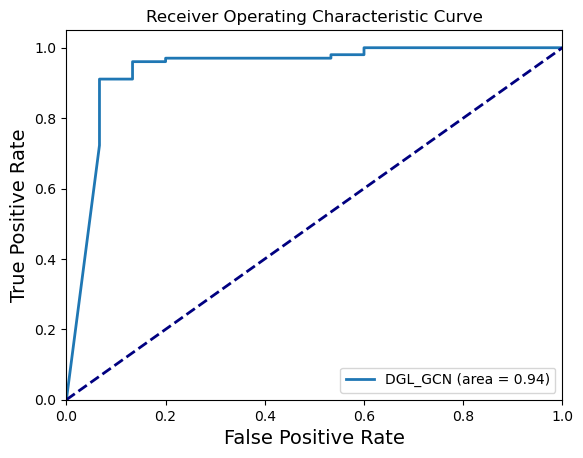

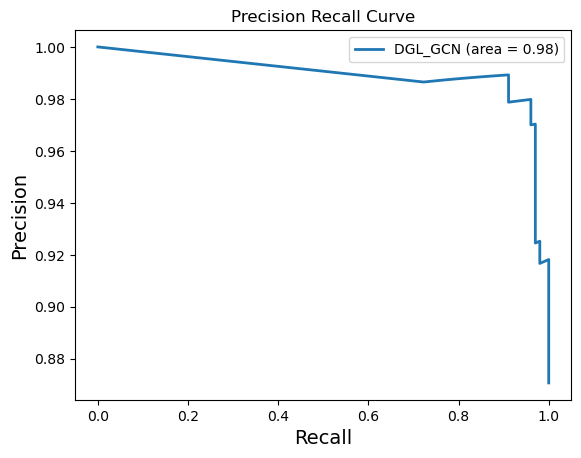

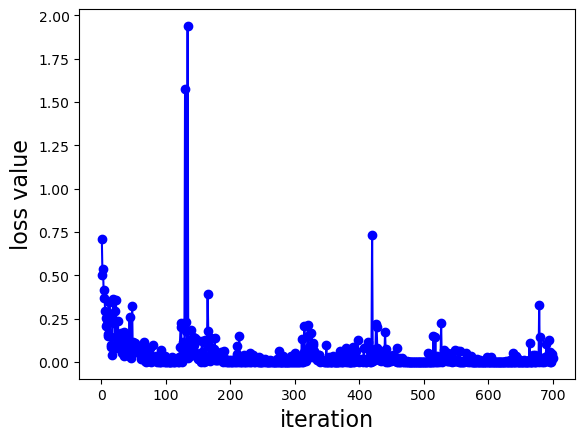

In [15]:
model.train(train, val, test)